In [ ]:
!pip install librosa

In [ ]:
from google.colab import files
import numpy as np
import librosa
import os
import zipfile
import matplotlib.pyplot as plt
import librosa.display

n_fft=1024
hop_length=320
window_type='hann'

def plot_spectrograms(group_label,audio_files,sample_rates,zipf):
    for i,(audio_data,sample_rate) in enumerate(zip(audio_files,sample_rates)):
        spectrogram_librosa=np.abs(librosa.stft(audio_data,n_fft=n_fft,hop_length=hop_length,win_length=n_fft,window=window_type))**2
        plt.figure(figsize=(10,6))
        plt.subplot(2,1,1)
        librosa.display.specshow(spectrogram_librosa,sr=sample_rate,x_axis='time',y_axis='linear',hop_length=hop_length)
        plt.title('Linear Frequency Power Spectrogram')
        plt.colorbar()
        plt.tight_layout()
        plt.subplot(2,1,2)
        plt.pcolormesh(np.arange(spectrogram_librosa.shape[1]),np.arange(spectrogram_librosa.shape[0]),10*np.log10(spectrogram_librosa),shading='gouraud')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [s]')
        plt.title(f'Spectrogram {i+1} - {group_label}')
        plt.colorbar(label='Power [dB]')
        spectrogram_filename=f"{group_label.replace(' ','_')}_spectrogram_{i+1}.png"
        plt.savefig(spectrogram_filename)
        plt.close()
        zipf.write(spectrogram_filename)
        os.remove(spectrogram_filename)
        print(f"Spectrogram {i+1} for {group_label} added to zip file")

orange148_audio_files=[]
orange148_sample_rates=[]
orange168_audio_files=[]
orange168_sample_rates=[]
purple19_audio_files=[]
purple19_sample_rates=[]

print("Upload WAV audio files for Orange 148:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange148_audio_files.append(audio_data)
    orange148_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Orange 168:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange168_audio_files.append(audio_data)
    orange168_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Purple 19:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    purple19_audio_files.append(audio_data)
    purple19_sample_rates.append(sample_rate)

zip_filename="spectrograms.zip"
with zipfile.ZipFile(zip_filename,'w') as zipf:
    plot_spectrograms("Orange 148",orange148_audio_files,orange148_sample_rates,zipf)
    plot_spectrograms("Orange 168",orange168_audio_files,orange168_sample_rates,zipf)
    plot_spectrograms("Purple 19",purple19_audio_files,purple19_sample_rates,zipf)

print(f"All spectrograms saved to {zip_filename}")
files.download(zip_filename)


Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (10).wav

Upload WAV audio files for Orange 168:


Saving Orange168_25.wav to Orange168_25 (7).wav

Upload WAV audio files for Purple 19:


Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (4).wav
Spectrogram 1 for Orange 148 added to zip file
Spectrogram 1 for Orange 168 added to zip file
Spectrogram 1 for Purple 19 added to zip file
All spectrograms saved to spectrograms.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This code facilitates the generation of spectrograms from uploaded WAV audio files. It defines parameters for spectrogram computation, including the window size and hop length. The `plot_spectrograms` function processes each audio file, computes its spectrogram using the Short-Time Fourier Transform (STFT), and visualizes it. The spectrograms are saved as images and added to a zip file. Users are prompted to upload audio files for different groups, and once processed, the spectrogram zip file is made available for download. This enables users to efficiently analyze and visualize the frequency content of their audio data.Here, the Hann window length plays a crucial role in determining the resolution of the spectrogram and is defined as 0.007 seconds. The Hann window is a type of window function used in signal processing to taper the edges of a signal before applying the Fourier transform. It is chosen for its ability to reduce spectral leakage, which occurs when the signal contains frequencies that are not integer multiples of the window length. Spectral leakage can distort the frequency content of the signal, leading to inaccurate spectral analysis. By tapering the signal's edges with the Hann window, spectral leakage is minimized, resulting in a more accurate representation of the signal's frequency content in the spectrogram. Additionally, the number of points used in the Fast Fourier Transform (FFT) is set to \(2^10\) to balance frequency and time resolution. The FFT is an efficient algorithm used to compute the discrete Fourier transform (DFT) of a sequence or signal. In the context of the provided code, the FFT is employed to compute the spectrogram of the audio signal. The spectrogram is a time-frequency representation of the signal, where the frequency content of the signal is analyzed over time. By applying the FFT to short segments of the audio signal (determined by the window length), the spectrogram reveals how the frequency content of the signal changes over time.Here,the window size is the same as FFT size. When the window size is equal to the FFT size, it means that the entire signal segment is used to compute each FFT frame. This can be advantageous in some scenarios:
Better frequency resolution: Using a longer window size allows for better frequency resolution in the resulting spectrum. This is because the longer window captures more samples of the signal, providing more frequency information in each FFT bin.
Reduced spectral leakage: Spectral leakage occurs when the frequency content of a signal falls between FFT bins, leading to spreading of energy across adjacent bins. Using a longer window can help mitigate spectral leakage, as it provides more samples to better capture the characteristics of the signal within each FFT frame.
However, there are also trade-offs to consider:
Temporal resolution: Longer windows provide better frequency resolution but sacrifice temporal resolution. This means that rapid changes in the signal may not be captured as accurately, leading to smearing in the time domain.
Computational cost: Increasing the window size increases the computational cost of the FFT operation. For real-time applications or large datasets, this increase in computational complexity may be undesirable.

In [ ]:
from google.colab import files
import numpy as np
import librosa
import os
import zipfile
import matplotlib.pyplot as plt
import librosa.display

n_fft=1024
hop_length=320
window_type='hann'
mel_bins=64

def plot_mel_spectrograms(group_label,audio_files,sample_rates,zipf):
    for i,(audio_data,sample_rate) in enumerate(zip(audio_files,sample_rates)):
        Mel_spectrogram=librosa.feature.melspectrogram(y=audio_data,sr=sample_rate,n_fft=n_fft,hop_length=hop_length,win_length=n_fft,window=window_type,n_mels=mel_bins,power=2.0)
        plt.figure(figsize=(10,6))
        librosa.display.specshow(Mel_spectrogram,sr=sample_rate,x_axis='time',y_axis='mel',hop_length=hop_length)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel spectrogram')
        plt.tight_layout()
        mel_spectrogram_filename=f"{group_label.replace(' ','_')}_mel_spectrogram_{i+1}.png"
        plt.savefig(mel_spectrogram_filename)
        plt.close()
        zipf.write(mel_spectrogram_filename)
        os.remove(mel_spectrogram_filename)
        print(f"Mel spectrogram {i+1} for {group_label} added to zip file")

orange148_audio_files=[]
orange148_sample_rates=[]
orange168_audio_files=[]
orange168_sample_rates=[]
purple19_audio_files=[]
purple19_sample_rates=[]

print("Upload WAV audio files for Orange 148:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange148_audio_files.append(audio_data)
    orange148_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Orange 168:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange168_audio_files.append(audio_data)
    orange168_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Purple 19:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    purple19_audio_files.append(audio_data)
    purple19_sample_rates.append(sample_rate)

zip_filename="mel_spectrograms.zip"
with zipfile.ZipFile(zip_filename,'w') as zipf:
    plot_mel_spectrograms("Orange 148",orange148_audio_files,orange148_sample_rates,zipf)
    plot_mel_spectrograms("Orange 168",orange168_audio_files,orange168_sample_rates,zipf)
    plot_mel_spectrograms("Purple 19",purple19_audio_files,purple19_sample_rates,zipf)

print(f"All mel spectrograms saved to {zip_filename}")
files.download(zip_filename)


Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (11).wav

Upload WAV audio files for Orange 168:


Saving Orange168_25.wav to Orange168_25 (8).wav

Upload WAV audio files for Purple 19:


Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (5).wav
Mel spectrogram 1 for Orange 148 added to zip file
Mel spectrogram 1 for Orange 168 added to zip file
Mel spectrogram 1 for Purple 19 added to zip file
All mel spectrograms saved to mel_spectrograms.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The hop length is the step or stride between windows. If the step is smaller than the window length, the windows will overlapThis script aims to generate Mel spectrograms from uploaded WAV audio files. Mel spectrograms are a type of spectrogram where the frequencies are converted to the Mel scale, which better aligns with human auditory perception. The code utilizes the Librosa library to compute the Mel spectrograms, specifying parameters such as the number of Mel bins and the window size. The `plot_mel_spectrograms` function processes each audio file, computes its Mel spectrogram, and visualizes it. The resulting Mel spectrograms are saved as images and added to a zip file. Users are prompted to upload WAV audio files for different groups, and upon processing, the Mel spectrogram zip file is made available for download. This enables users to analyze and visualize the frequency content of their audio data in a way that reflects human auditory perception more accurately.

In [13]:
from google.colab import files
import numpy as np
import librosa
import os
import zipfile
import matplotlib.pyplot as plt
import librosa.display

n_fft=1024
hop_length=320
window_type='hann'
mel_bins=64

def save_log_mel_spectrograms(group_label,audio_files,sample_rates,zipf):
    for i,(audio_data,sample_rate) in enumerate(zip(audio_files,sample_rates)):
        Mel_spectrogram=librosa.feature.melspectrogram(y=audio_data,sr=sample_rate,n_fft=n_fft,hop_length=hop_length,win_length=n_fft,window=window_type,n_mels=mel_bins,power=2.0)
        mel_spectrogram_db=librosa.power_to_db(Mel_spectrogram,ref=np.max)

        spectrogram_filename=f"{group_label.replace(' ','_')}_spectrogram_{i + 1}.png"
        plt.figure(figsize=(10,6))
        librosa.display.specshow(mel_spectrogram_db,sr=sample_rate,x_axis='time',y_axis='mel',hop_length=hop_length)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel spectrogram {i + 1} - {group_label}')
        plt.tight_layout()
        plt.savefig(spectrogram_filename)
        plt.close()

        npy_filename=f"{group_label.replace(' ','_')}_spectrogram_{i + 1}.npy"
        np.save(npy_filename,mel_spectrogram_db)

        txt_filename=f"{group_label.replace(' ','_')}_spectrogram_{i + 1}.txt"
        np.savetxt(txt_filename,mel_spectrogram_db)

        zipf.write(spectrogram_filename)
        zipf.write(npy_filename)
        zipf.write(txt_filename)

        os.remove(spectrogram_filename)
        os.remove(npy_filename)
        os.remove(txt_filename)

        print(f"Mel spectrogram {i + 1} for {group_label} added to zip file")

orange148_audio_files=[]
orange148_sample_rates=[]
orange168_audio_files=[]
orange168_sample_rates=[]
purple19_audio_files=[]
purple19_sample_rates=[]

print("Upload WAV audio files for Orange 148:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange148_audio_files.append(audio_data)
    orange148_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Orange 168:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange168_audio_files.append(audio_data)
    orange168_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Purple 19:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    purple19_audio_files.append(audio_data)
    purple19_sample_rates.append(sample_rate)

zip_filename="log_mel_spectrograms.zip"
with zipfile.ZipFile(zip_filename,'w') as zipf:
    save_log_mel_spectrograms("Orange 148",orange148_audio_files,orange148_sample_rates,zipf)
    save_log_mel_spectrograms("Orange 168",orange168_audio_files,orange168_sample_rates,zipf)
    save_log_mel_spectrograms("Purple 19",purple19_audio_files,purple19_sample_rates,zipf)

print(f"All log Mel spectrograms saved to {zip_filename}")
files.download(zip_filename)




Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (8).wav

Upload WAV audio files for Orange 168:


Saving Orange168_25.wav to Orange168_25 (7).wav

Upload WAV audio files for Purple 19:


Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (10).wav
Mel spectrogram 1 for Orange 148 added to zip file
Mel spectrogram 1 for Orange 168 added to zip file
Mel spectrogram 1 for Purple 19 added to zip file
All log Mel spectrograms saved to log_mel_spectrograms.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This script performs similar operations to the previous one but focuses on generating log Mel spectrograms instead of standard Mel spectrograms. Log Mel spectrograms are obtained by applying a logarithmic transformation to the magnitude of Mel spectrograms. This transformation compresses the dynamic range of the spectrogram, making it more suitable for tasks like speech and audio signal processing, where the emphasis is on the relative changes in spectral content rather than absolute values.

The script computes log Mel spectrograms using Librosa, saves them as PNG images, and includes them in a zip file for download. Additionally, it saves the log Mel spectrograms as NumPy arrays (.npy) and text files (.txt). These formats are common for storing numerical data and can be useful for machine learning tasks such as audio event detection. The log Mel spectrograms can serve as feature representations for machine learning algorithms, where they are fed into models for tasks like speech recognition or sound classification. The NumPy arrays and text files provide convenient formats for loading the spectrogram data into memory during model training or inference. Overall, the combination of log Mel spectrograms and their corresponding NumPy and text file representations facilitates efficient data storage, manipulation, and analysis in audio detection applications.

In [3]:
from google.colab import files
import numpy as np
import librosa
import os
import zipfile
import matplotlib.pyplot as plt
import librosa.display

n_fft=1024
hop_length=320
window_type='hann'
mel_bins=64

def plot_mel_filter_bank(sr,n_fft,n_mels):
    mel_filter_bank=librosa.filters.mel(sr=sr,n_fft=n_fft,n_mels=n_mels,fmin=0.0,fmax=None,htk=False,norm='slaney')
    return mel_filter_bank

def plot_spectrograms(group_label,audio_files,sample_rates,zipf):
    for i,(audio_data,sample_rate) in enumerate(zip(audio_files,sample_rates)):
        mel_filter_bank=plot_mel_filter_bank(sr=sample_rate,n_fft=n_fft,n_mels=mel_bins)
        spectrogram_librosa=np.abs(librosa.stft(audio_data,n_fft=n_fft,hop_length=hop_length,win_length=n_fft,window=window_type))**2

        spectrogram_filename=f"{group_label.replace(' ','_')}_mel_filter_bank_{i + 1}.png"
        plt.figure(figsize=(8,6))
        librosa.display.specshow(mel_filter_bank,sr=sample_rate,x_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Filter Bank')
        plt.tight_layout()
        plt.savefig(spectrogram_filename)
        plt.close()

        zipf.write(spectrogram_filename)
        os.remove(spectrogram_filename)
        print(f"Mel filter bank {i + 1} for {group_label} added to zip file")

orange148_audio_files=[]
orange148_sample_rates=[]
orange168_audio_files=[]
orange168_sample_rates=[]
purple19_audio_files=[]
purple19_sample_rates=[]

print("Upload WAV audio files for Orange 148:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange148_audio_files.append(audio_data)
    orange148_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Orange 168:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    orange168_audio_files.append(audio_data)
    orange168_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Purple 19:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,sample_rate=librosa.load(filename,sr=None)
    purple19_audio_files.append(audio_data)
    purple19_sample_rates.append(sample_rate)

zip_filename="mel_filter_banks.zip"
with zipfile.ZipFile(zip_filename,'w') as zipf:
    plot_spectrograms("Orange 148",orange148_audio_files,orange148_sample_rates,zipf)
    plot_spectrograms("Orange 168",orange168_audio_files,orange168_sample_rates,zipf)
    plot_spectrograms("Purple 19",purple19_audio_files,purple19_sample_rates,zipf)

print(f"All mel filter banks saved to {zip_filename}")
files.download(zip_filename)




Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (2).wav

Upload WAV audio files for Orange 168:


Saving Orange168_25.wav to Orange168_25 (2).wav

Upload WAV audio files for Purple 19:


Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (2).wav
Mel filter bank 1 for Orange 148 added to zip file
Mel filter bank 1 for Orange 168 added to zip file
Mel filter bank 1 for Purple 19 added to zip file
All mel filter banks saved to mel_filter_banks.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mel filter banks, often used in audio signal processing, are a set of band-pass filters applied to the frequency spectrum of an audio signal. These filters are designed to mimic the human auditory system's response to different frequencies, where higher resolution is allocated to lower frequencies and coarser resolution to higher frequencies. Mel filter banks are commonly used in conjunction with Mel spectrograms to analyze and represent audio signals in a more perceptually relevant manner. The filter banks divide the audio spectrum into distinct frequency bands, with each band corresponding to a specific Mel frequency. Mel filter banks are particularly useful for tasks like speech recognition, music analysis, and sound classification, where capturing relevant frequency information while minimizing computational complexity is essential. In the provided code, Mel filter banks are generated using Librosa and saved as images for visualization and analysis.

In [5]:
from google.colab import files
import numpy as np
import librosa
import os
import zipfile
import matplotlib.pyplot as plt

def plot_waveform_and_spectrum(group_label, audio_files, sample_rates, zipf):
    for i, (audio_data, sample_rate) in enumerate(zip(audio_files, sample_rates)):

        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(len(audio_data)) / sample_rate, audio_data, alpha=0.4)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title("Waveform")

        waveform_filename = f"{group_label.replace(' ', '_')}_waveform_{i + 1}.png"
        plt.savefig(waveform_filename)
        plt.close()

        zipf.write(waveform_filename)
        os.remove(waveform_filename)
        print(f"Waveform {i + 1} for {group_label} added to zip file")

        fft = np.fft.fft(audio_data)
        spectrum = np.abs(fft)
        f = np.linspace(0, sample_rate, len(spectrum))
        left_spectrum = spectrum[:int(len(spectrum)/2)]
        left_f = f[:int(len(spectrum)/2)]

        plt.figure(figsize=(10, 6))
        plt.plot(left_f, left_spectrum, alpha=0.4)
        plt.xlabel("Frequency")
        plt.ylabel("Magnitude")
        plt.title("Power spectrum")

        spectrum_filename = f"{group_label.replace(' ', '_')}_spectrum_{i + 1}.png"
        plt.savefig(spectrum_filename)
        plt.close()

        zipf.write(spectrum_filename)
        os.remove(spectrum_filename)
        print(f"Power spectrum {i + 1} for {group_label} added to zip file")


orange148_audio_files = []
orange148_sample_rates = []
orange168_audio_files = []
orange168_sample_rates = []
purple19_audio_files = []
purple19_sample_rates = []

print("Upload WAV audio files for Orange 148:")
uploaded = files.upload()
for filename in uploaded.keys():
    audio_data, sample_rate = librosa.load(filename, sr=None)
    orange148_audio_files.append(audio_data)
    orange148_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Orange 168:")
uploaded = files.upload()
for filename in uploaded.keys():
    audio_data, sample_rate = librosa.load(filename, sr=None)
    orange168_audio_files.append(audio_data)
    orange168_sample_rates.append(sample_rate)

print("\nUpload WAV audio files for Purple 19:")
uploaded = files.upload()
for filename in uploaded.keys():
    audio_data, sample_rate = librosa.load(filename, sr=None)
    purple19_audio_files.append(audio_data)
    purple19_sample_rates.append(sample_rate)

zip_filename = "waveform_and_spectrum.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    plot_waveform_and_spectrum("Orange 148", orange148_audio_files, orange148_sample_rates, zipf)
    plot_waveform_and_spectrum("Orange 168", orange168_audio_files, orange168_sample_rates, zipf)
    plot_waveform_and_spectrum("Purple 19", purple19_audio_files, purple19_sample_rates, zipf)

print(f"All waveforms and power spectra saved to {zip_filename}")
files.download(zip_filename)

Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (3).wav

Upload WAV audio files for Orange 168:


Saving Orange168_25.wav to Orange168_25 (3).wav

Upload WAV audio files for Purple 19:


Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (3).wav
Waveform 1 for Orange 148 added to zip file
Power spectrum 1 for Orange 148 added to zip file
Waveform 1 for Orange 168 added to zip file
Power spectrum 1 for Orange 168 added to zip file
Waveform 1 for Purple 19 added to zip file
Power spectrum 1 for Purple 19 added to zip file
All waveforms and power spectra saved to waveform_and_spectrum.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The code provided generates waveform plots and power spectrum plots for each audio file uploaded. The waveform plot illustrates the amplitude of the audio signal over time, providing a visual representation of the sound's temporal characteristics. This waveform visualization helps in understanding the structure and dynamics of the audio. The power spectrum plot, on the other hand, represents the frequency content of the audio signal by displaying the magnitude of each frequency component. It helps identify dominant frequencies and spectral characteristics present in the audio. Both waveform and power spectrum plots are essential tools for analyzing audio signals in various applications such as speech recognition, music analysis, and sound classification. They provide insights into the temporal and spectral properties of the audio, aiding in feature extraction and signal processing tasks.

In [ ]:
!pip install numpy scipy librosa pandas scikit-learn tensorflow matplotlib

In [6]:
import numpy as np
import scipy.signal as signal
import librosa
import pandas as pd
from google.colab import files

window_length=0.007 #advised by an article

def calculate_wiener_entropy(spectrogram):
    spectral_flatness=np.exp(np.mean(np.log(spectrogram),axis=0))/np.mean(spectrogram,axis=0)
    wiener_entropy=1-spectral_flatness
    return wiener_entropy

def estimate_pitch(audio_data,sr):
    pitches,magnitudes=librosa.piptrack(y=audio_data,sr=sr)
    pitch=np.median(pitches[magnitudes>np.median(magnitudes)])
    return pitch

def calculate_spectral_continuity(frequencies):
    diff_frequencies=np.diff(frequencies,axis=0)
    spectral_continuity=np.mean(np.abs(diff_frequencies))
    return spectral_continuity

def analyze_frequency_modulation(frequencies):
    frequency_modulation=np.mean(np.gradient(frequencies,axis=0))
    return frequency_modulation

def extract_features(audio_files):
    features=[]
    for group_label,audio_files_group in zip(["Orange 148","Orange 168","Purple 19"],audio_files):
        for audio_data in audio_files_group:
            sr=32000
            nperseg=int(window_length*sr)
            peak_value=np.max(np.abs(audio_data))
            frequencies,_,spectrogram=signal.spectrogram(audio_data,fs=sr,window='hann',nperseg=nperseg,noverlap=0,nfft=2**10)
            filtered_frequencies=signal.filtfilt(*signal.butter(4,0.1,'low'),x=frequencies) #Apply Butterworth filter
            wiener_entropy=calculate_wiener_entropy(spectrogram)
            pitch=estimate_pitch(audio_data,sr)
            spectral_continuity=calculate_spectral_continuity(filtered_frequencies)
            frequency_modulation=analyze_frequency_modulation(filtered_frequencies)
            wiener_entropy_mean=np.mean(wiener_entropy)
            wiener_entropy_median=np.median(wiener_entropy)
            wiener_entropy_std=np.std(wiener_entropy)
            features.append([wiener_entropy_mean,wiener_entropy_median,wiener_entropy_std,pitch,spectral_continuity,frequency_modulation,peak_value,group_label])
    return np.array(features)

def extract_wiener_entropy_and_pitch(audio_files):
    features=[]
    for group_label,audio_files_group in zip(["Orange 148","Orange 168","Purple 19"],audio_files):
        for audio_data in audio_files_group:
            sr=32000
            nperseg=int(window_length*sr)
            peak_value=np.max(np.abs(audio_data))
            frequencies,_,spectrogram=signal.spectrogram(audio_data,fs=sr,window='hann',nperseg=nperseg,noverlap=0,nfft=2**10)
            wiener_entropy=calculate_wiener_entropy(spectrogram)
            pitch=estimate_pitch(audio_data,sr)
            wiener_entropy_mean=np.mean(wiener_entropy)
            wiener_entropy_median=np.median(wiener_entropy)
            wiener_entropy_std=np.std(wiener_entropy)
            features.append([wiener_entropy_std,pitch,peak_value,group_label])
    return np.array(features)

orange148_audio_files=[]
orange168_audio_files=[]
purple19_audio_files=[]

print("Upload WAV audio files for Orange 148:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,_=librosa.load(filename,sr=None)
    orange148_audio_files.append(audio_data)

print("\nUpload WAV audio files for Orange 168:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,_=librosa.load(filename,sr=None)
    orange168_audio_files.append(audio_data)

print("\nUpload WAV audio files for Purple 19:")
uploaded=files.upload()
for filename in uploaded.keys():
    audio_data,_=librosa.load(filename,sr=None)
    purple19_audio_files.append(audio_data)

audio_files=[orange148_audio_files,orange168_audio_files,purple19_audio_files]

features=extract_features(audio_files)
wiener_entropy_and_pitch_features=extract_wiener_entropy_and_pitch(audio_files)

df=pd.DataFrame(features,columns=['Wiener Entropy Mean', 'Wiener Entropy Median', 'Wiener Entropy Std', 'Pitch','Spectral Continuity','Frequency Modulation','Peak Value','Group'])
df.to_csv('bird_features.csv',index=False)
print("Features saved to bird_features.csv")
files.download('bird_features.csv')

df_wiener_entropy_and_pitch=pd.DataFrame(wiener_entropy_and_pitch_features,columns=['Wiener Entropy std','Pitch','Peak Value','Group'])
df_wiener_entropy_and_pitch.to_csv('bird_features_wiener_entropy_and_pitch.csv',index=False)
print("Wiener Entropy and Pitch Features saved to bird_features_wiener_entropy_and_pitch.csv")
files.download('bird_features_wiener_entropy_and_pitch.csv')



Upload WAV audio files for Orange 148:


Saving Orange148_16.wav to Orange148_16 (4).wav
Saving Orange148_17.wav to Orange148_17 (1).wav
Saving Orange148_18.wav to Orange148_18 (1).wav
Saving Orange148_19.wav to Orange148_19 (1).wav
Saving Orange148_20.wav to Orange148_20 (1).wav
Saving Orange148_21.wav to Orange148_21 (1).wav
Saving Orange148_05.wav to Orange148_05 (1).wav
Saving Orange148_06.wav to Orange148_06 (1).wav
Saving Orange148_07.wav to Orange148_07 (1).wav
Saving Orange148_08.wav to Orange148_08 (1).wav
Saving Orange148_09.wav to Orange148_09 (1).wav
Saving Orange148_10.wav to Orange148_10 (1).wav
Saving Orange148_11.wav to Orange148_11 (1).wav
Saving Orange148_12.wav to Orange148_12 (1).wav
Saving Orange148_13.wav to Orange148_13 (1).wav
Saving Orange148_14.wav to Orange148_14 (1).wav
Saving Orange148_15.wav to Orange148_15 (1).wav
Saving Orange148_01.wav to Orange148_01 (1).wav
Saving Orange148_02.wav to Orange148_02 (1).wav
Saving Orange148_03.wav to Orange148_03 (1).wav
Saving Orange148_04.wav to Orange148_04 

Saving Orange168_25.wav to Orange168_25 (4).wav
Saving Orange168_26.wav to Orange168_26 (1).wav
Saving Orange168_27.wav to Orange168_27 (1).wav
Saving Orange168_28.wav to Orange168_28 (1).wav
Saving Orange168_29.wav to Orange168_29 (1).wav
Saving Orange168_30.wav to Orange168_30 (1).wav
Saving Orange168_14.wav to Orange168_14 (1).wav
Saving Orange168_15.wav to Orange168_15 (1).wav
Saving Orange168_16.wav to Orange168_16 (1).wav
Saving Orange168_17.wav to Orange168_17 (1).wav
Saving Orange168_18.wav to Orange168_18 (1).wav
Saving Orange168_19.wav to Orange168_19 (1).wav
Saving Orange168_20.wav to Orange168_20 (1).wav
Saving Orange168_21.wav to Orange168_21 (1).wav
Saving Orange168_22.wav to Orange168_22 (1).wav
Saving Orange168_23.wav to Orange168_23 (1).wav
Saving Orange168_24.wav to Orange168_24 (1).wav
Saving Orange168_01.wav to Orange168_01 (1).wav
Saving Orange168_02.wav to Orange168_02 (1).wav
Saving Orange168_03.wav to Orange168_03 (1).wav
Saving Orange168_04.wav to Orange168_04 

Saving prpl19_150319_great__record_prpl19_0053_pcm_000.wav to prpl19_150319_great__record_prpl19_0053_pcm_000 (4).wav
Saving prpl19_150319_great__record_prpl19_0054_pcm_000.wav to prpl19_150319_great__record_prpl19_0054_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0055_pcm_000.wav to prpl19_150319_great__record_prpl19_0055_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0056_pcm_000.wav to prpl19_150319_great__record_prpl19_0056_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0025_pcm_000.wav to prpl19_150319_great__record_prpl19_0025_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0027_pcm_000.wav to prpl19_150319_great__record_prpl19_0027_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0028_pcm_000.wav to prpl19_150319_great__record_prpl19_0028_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0029_pcm_000.wav to prpl19_150319_great__record_prpl19_0029_pcm_000 (1).wav
Saving prpl19_150319_great__record_prpl19_0031_pcm_000.w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Wiener Entropy and Pitch Features saved to bird_features_wiener_entropy_and_pitch.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In this code snippet, several audio features are extracted from uploaded audio files, categorized into three groups: "Orange 148," "Orange 168," and "Purple 19." The features include Wiener entropy (mean, median, and standard deviation), pitch, spectral continuity, frequency modulation, and peak value. Wiener entropy quantifies the randomness of the signal's power spectrum, while pitch measures the perceived frequency of the sound. Spectral continuity evaluates the smoothness of frequency changes over time, and frequency modulation indicates the rate of change of frequency over time. Additionally, the peak value represents the maximum amplitude of the audio signal. These features are computed using the `librosa` and `scipy.signal` libraries. Furthermore, a Butterworth filter is applied to each audio signal to remove high-frequency noise or artifacts, ensuring the accuracy of subsequent feature extraction. Finally, the extracted features are saved to CSV files for further analysis. Note that only the frequency modulation and spectral continuities were coming out as constants for all audios soI didnt use them in nueral network

NOTE:

When applying nueral networks, we decided to convert the bird groups Orange148, Orange168, and Purple19 to 0,1,2 respectively for simplicity.

THERE IS NO NEED TO USE THIS FUNCTION IF CSV FILE ALREADY IN THIS FORMAT

In [14]:
from google.colab import files
import pandas as pd
import numpy as np

df = pd.read_csv('/content/bird_features_wiener_entropy_and_pitch.csv')

group_mapping = {'Orange 148': 0, 'Orange 168': 1, 'Purple 19': 2}

df['Group'] = df['Group'].map(group_mapping)

df_shuffled = df.iloc[1:].sample(frac=1).reset_index(drop=True)

df_final = pd.concat([df.iloc[:1], df_shuffled])

output_filename = 'binary_bird_features_wiener_entropy_and_pitch.csv'
df_final.to_csv(output_filename, index=False)
print(f"Shuffled data saved to {output_filename}")
files.download(output_filename)

Shuffled data saved to binary_bird_features_wiener_entropy_and_pitch.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This code takes in the csv file, converts the output to 0,1,2, and shuffles the rows

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lab_utils_common import dlc
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
data = pd.read_csv("bird_binary.csv")
print(data)
# Load the data
data = pd.read_csv("bird_binary.csv")
# Extract features and target
features = data[['Wiener Entropy Mean', 'Wiener Entropy Median', 'Wiener Entropy Std']].values
labels = data['Group'].values

    Wiener Entropy Mean  Wiener Entropy Median  Wiener Entropy Std  Group
0              0.997432               0.998218            0.003640      0
1              0.972784               0.999079            0.061016      2
2              0.997751               0.998478            0.003489      0
3              0.997255               0.998280            0.004775      0
4              0.997886               0.998636            0.002946      0
..                  ...                    ...                 ...    ...
75             0.999825               0.999870            0.000236      1
76             0.999731               0.999821            0.000306      1
77             0.996756               0.998012            0.004932      0
78             0.974136               0.998544            0.058830      2
79             0.999762               0.999837            0.000320      1

[80 rows x 4 columns]


In [ ]:

#90% for training 10% for testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.1, random_state=42)

In [ ]:
# Normalize features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
# Convert labels to float32
labels_train = labels_train.astype(np.float32)
labels_test = labels_test.astype(np.float32)


In [ ]:
tf.random.set_seed(1234)  # applied to achieve consistent results
# Define the model with a single unit and sigmoid activation for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')#sigmoid yielded better results than softmax
])

model.summary()
print("INITIAL PARAMETERS: (just random numbers)")
for layer in model.layers:
    if layer.trainable:
        W, b = layer.get_weights()
        print(f"Layer {layer.name}:")
        print(f"  Weights shape: {W.shape}")
        print(f"  Biases shape: {b.shape}")
        print(f"  Weights:\n{W}")
        print(f"  Biases:\n{b}")

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 64)                256       
                                                                 
 dense_133 (Dense)           (None, 32)                2080      
                                                                 
 dense_134 (Dense)           (None, 16)                528       
                                                                 
 dense_135 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INITIAL PARAMETERS: (just random numbers)
Layer dense_132:
  Weights shape: (3, 64)
  Biases shape: (64,)
  Weights:
[[ 0.11 -0.25 -0.02  0.   -0.09  0

Epoch 1/100
3/3 [==============================] - 1s 115ms/step - loss: -44.5216 - accuracy: 0.4583 - val_loss: -1784.0560 - val_accuracy: 0.3750
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: -2945.8982 - accuracy: 0.5139 - val_loss: -22979.2578 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: -25489.2266 - accuracy: 0.6111 - val_loss: -122832.1250 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: -119577.2500 - accuracy: 0.5833 - val_loss: -421929.3125 - val_accuracy: 0.3750
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: -339951.9375 - accuracy: 0.5139 - val_loss: -1141649.2500 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: -937577.3125 - accuracy: 0.6111 - val_loss: -2611839.2500 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: -2088002.6250 - accurac

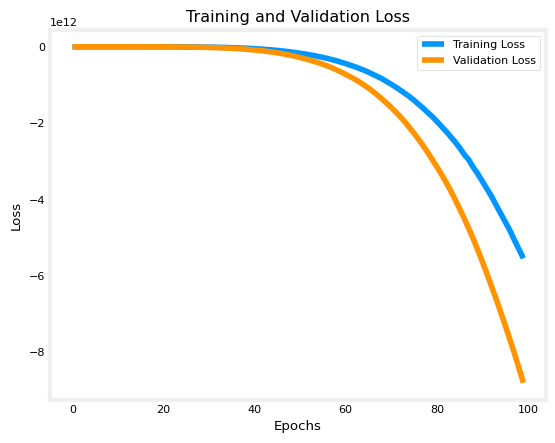

In [ ]:

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    features_train, labels_train,
    epochs=100,
    batch_size=32,
    validation_data=(features_test, labels_test)
)

# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
W1, b1 = model.get_layer(index=0).get_weights()
W2, b2 = model.get_layer(index=1).get_weights()
W3, b3 = model.get_layer(index=2).get_weights()
W4, b4 = model.get_layer(index=3).get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)
print("W3:\n", W3, "\nb3:", b3)
print("W4:\n", W4, "\nb4:", b4)


W1:
 [[-1.78e+02 -1.80e+02 -1.79e+02 -1.79e+02 -1.66e+02 -1.79e+02 -6.50e+01
  -1.59e+02 -1.79e+02 -1.79e+02 -1.56e+02  1.17e+02 -1.80e+02 -1.80e+02
  -1.80e+02  1.16e+02 -1.56e+02 -1.79e+02 -1.61e+02 -1.46e+02 -1.79e+02
  -1.80e+02 -1.80e+02 -2.00e-01  1.16e+02 -1.79e+02 -1.50e+02 -1.80e+02
   1.16e+02 -1.62e+02  8.51e-01 -1.79e+02 -1.79e+02 -1.79e+02 -1.58e+02
  -1.43e+02 -1.79e+02 -8.69e-01 -1.79e+02  1.17e+02 -1.76e+02 -1.79e+02
  -1.79e+02 -1.80e+02 -1.50e+00 -1.79e+02 -1.56e+02 -1.80e+02 -1.78e+02
  -5.80e-01 -5.96e-01 -1.79e+02 -1.72e+02 -1.80e+02 -1.80e+02 -1.55e+02
  -4.09e-01 -1.62e+02 -1.24e+02 -1.80e+02 -1.79e+02 -1.79e+02  1.17e+02
  -1.74e+02]
 [-5.06e+01 -5.08e+01 -5.08e+01 -4.92e+01 -3.94e+01 -5.20e+01  1.69e+00
  -3.82e+01 -5.12e+01 -4.95e+01 -3.66e+01 -1.23e+02 -4.96e+01 -5.00e+01
  -5.11e+01 -1.22e+02 -3.49e+01 -5.10e+01 -3.76e+01 -2.98e+01 -5.17e+01
  -4.96e+01 -5.08e+01  1.59e+00 -1.21e+02 -5.03e+01 -3.02e+01 -5.08e+01
  -1.23e+02 -3.89e+01  6.33e-01 -5.14e+01 -5.1

In [ ]:
# Make predictions on the testing data
predictions = model.predict(features_test)

for i in range (len(predictions)):
  if predictions[i] <= 0.33: predictions[i] = 0
  elif predictions[i] >= 0.66: predictions[i] = 2
  else: predictions[i] = 1

# Combine predictions and actual labels
results = np.column_stack((predictions, labels_test))

# Display predictions and actual values
print("Predictions vs. Actual:")
print("Predictions     Actual")
for i in range(len(results)):
    print(f"{results[i][0]:.4f}       {results[i][1]:.0f}")

#Accuracy calculator
counter = 0
for i in range (len(predictions)):
  if predictions[i] == labels_test[i]:
    counter += 1
print("Accuracy: ", (counter/len(predictions))*100)

1/1 [==============================] - 0s 76ms/step
Predictions vs. Actual:
Predictions     Actual
2.0000       1
0.0000       0
2.0000       2
0.0000       0
2.0000       2
2.0000       1
2.0000       2
2.0000       2
Accuracy:  75.0


I found that the bird_binary.csv that contained the weiner entropy mean, median, and std gave the best result.

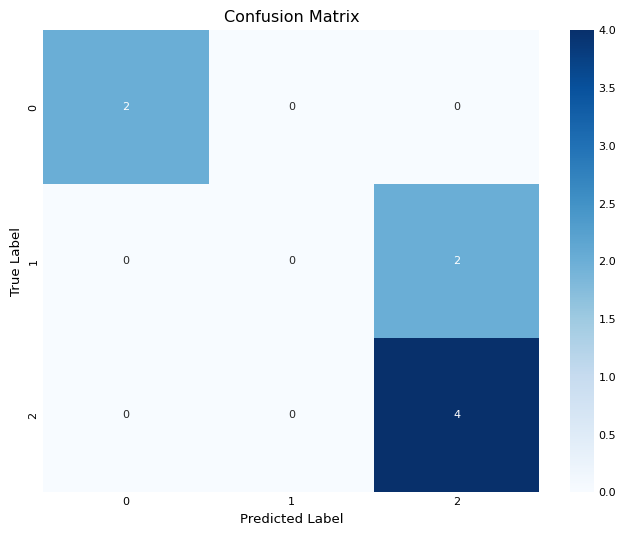

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(labels_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In a confusion matrix with 9 sections, each representing different combinations of true and predicted labels in a classification problem, the presence of dark blue boxes in specific locations provides valuable insights into the model's performance:

Bottom Right: A dark blue box in the bottom-right corner indicates that the model correctly predicted instances of class 2 (true positive) in the dataset. This suggests that the model performs well in identifying class 2 instances.

Middle Right (Top): A dark blue box in the middle-right section, particularly in the top row, suggests that the model incorrectly predicted instances from other classes as class 2 (false positive). This indicates a potential area for improvement, as the model may be misclassifying some instances.

Top Left: A dark blue box in the top-left corner signifies that the model correctly predicted instances of other classes as not belonging to class 2 (true negative). If class 2 is the minority class, a high number of true negatives might indicate a bias towards the majority class(es) or a lack of sensitivity towards the minority class.



In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(labels_test, predictions)
print(class_report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       0.00      0.00      0.00         2
         2.0       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.56      0.67      0.60         8
weighted avg       0.58      0.75      0.65         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
